In [1]:
import pandas as pd
from utils.data_preparation.prepare_time_series import prepare_time_series_data

from utils.ensemble.ensemble_forecast import ensemble_forecast
from utils.ensemble.plot_ensemble_forecast import plot_ensemble_forecast

from utils.prediction.ensemble_prediction import run_prediction_for_vehicle

from config import DATA_CSV_FILE


ML Model Metrics: {'MAE': 950.1315789473684, 'RMSE': np.float64(1440.1048322586578), 'R2': 0.4950132764515097}


/home/tjselevani/Desktop/Apps/vscode/python/python analysis/utils/forecast/create_forecast_ml.py:85: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1245.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  future_df.loc[i, "earnings"] = model.predict(X_future)[0]


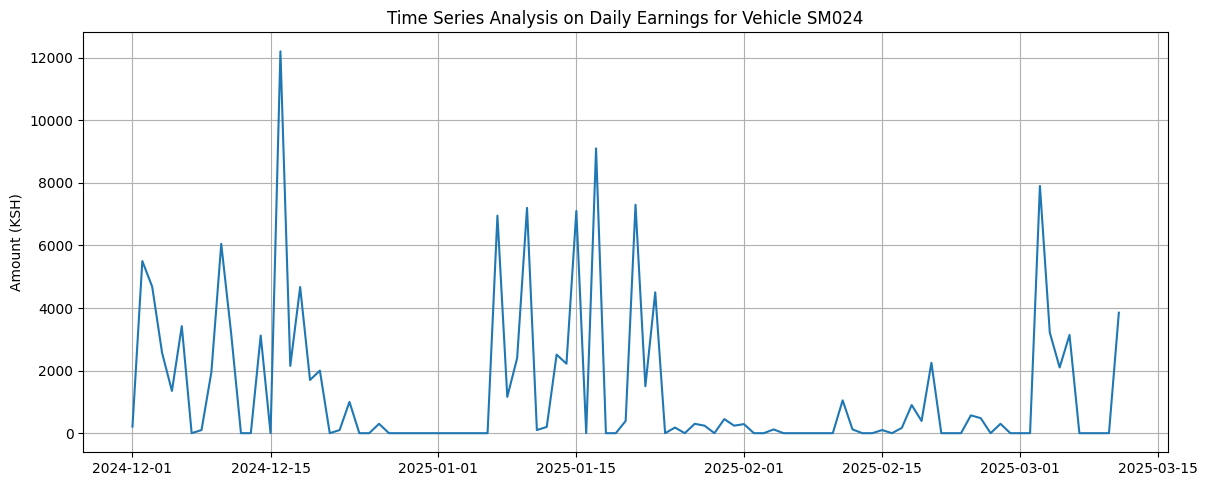

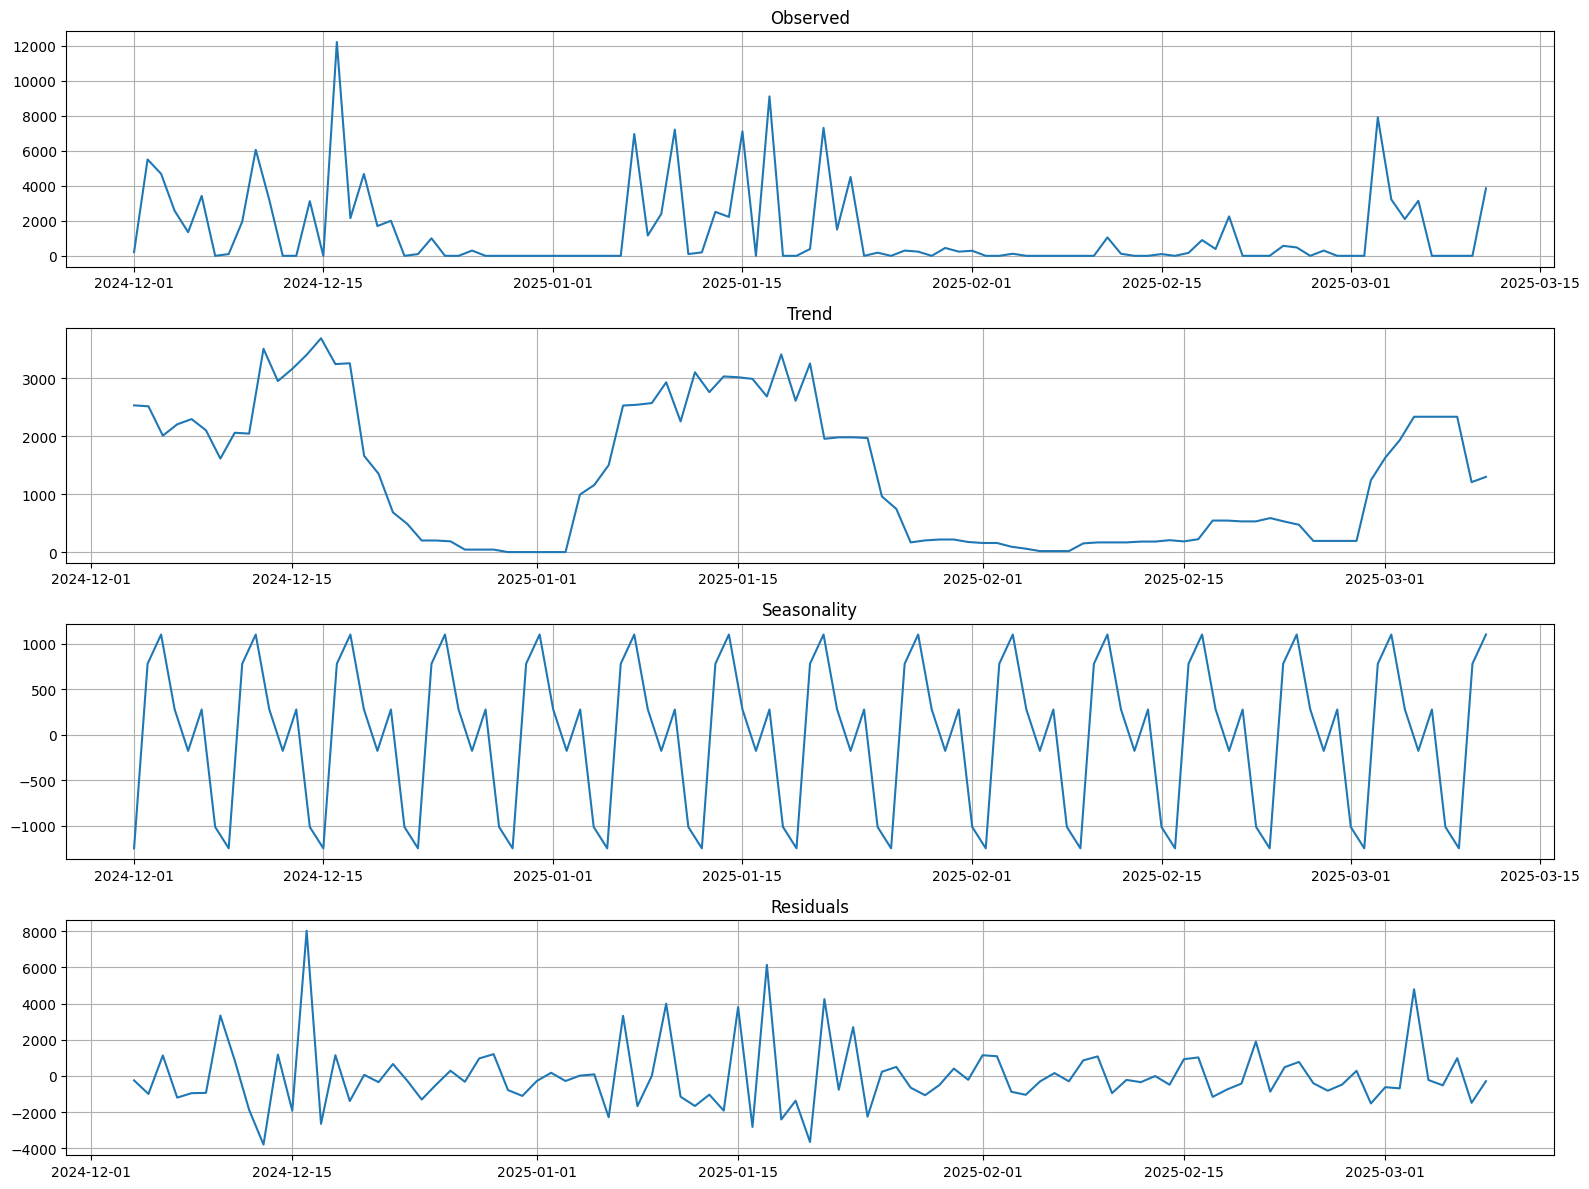

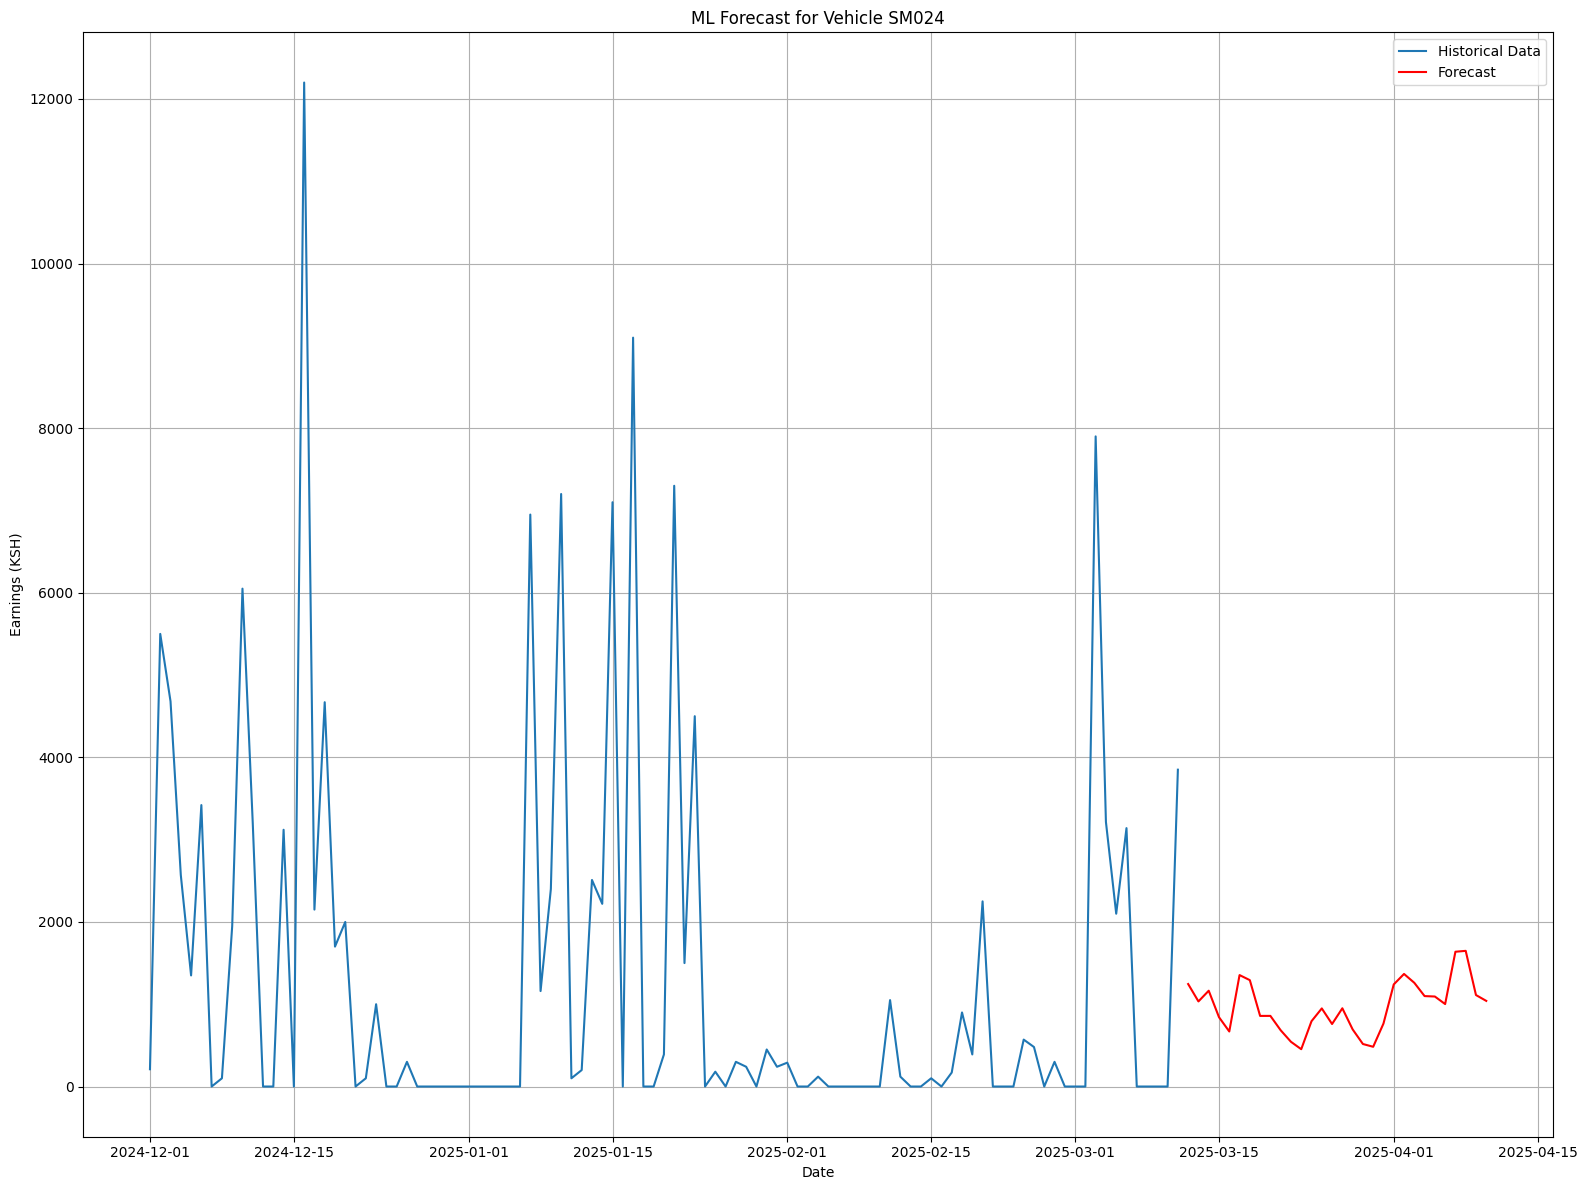

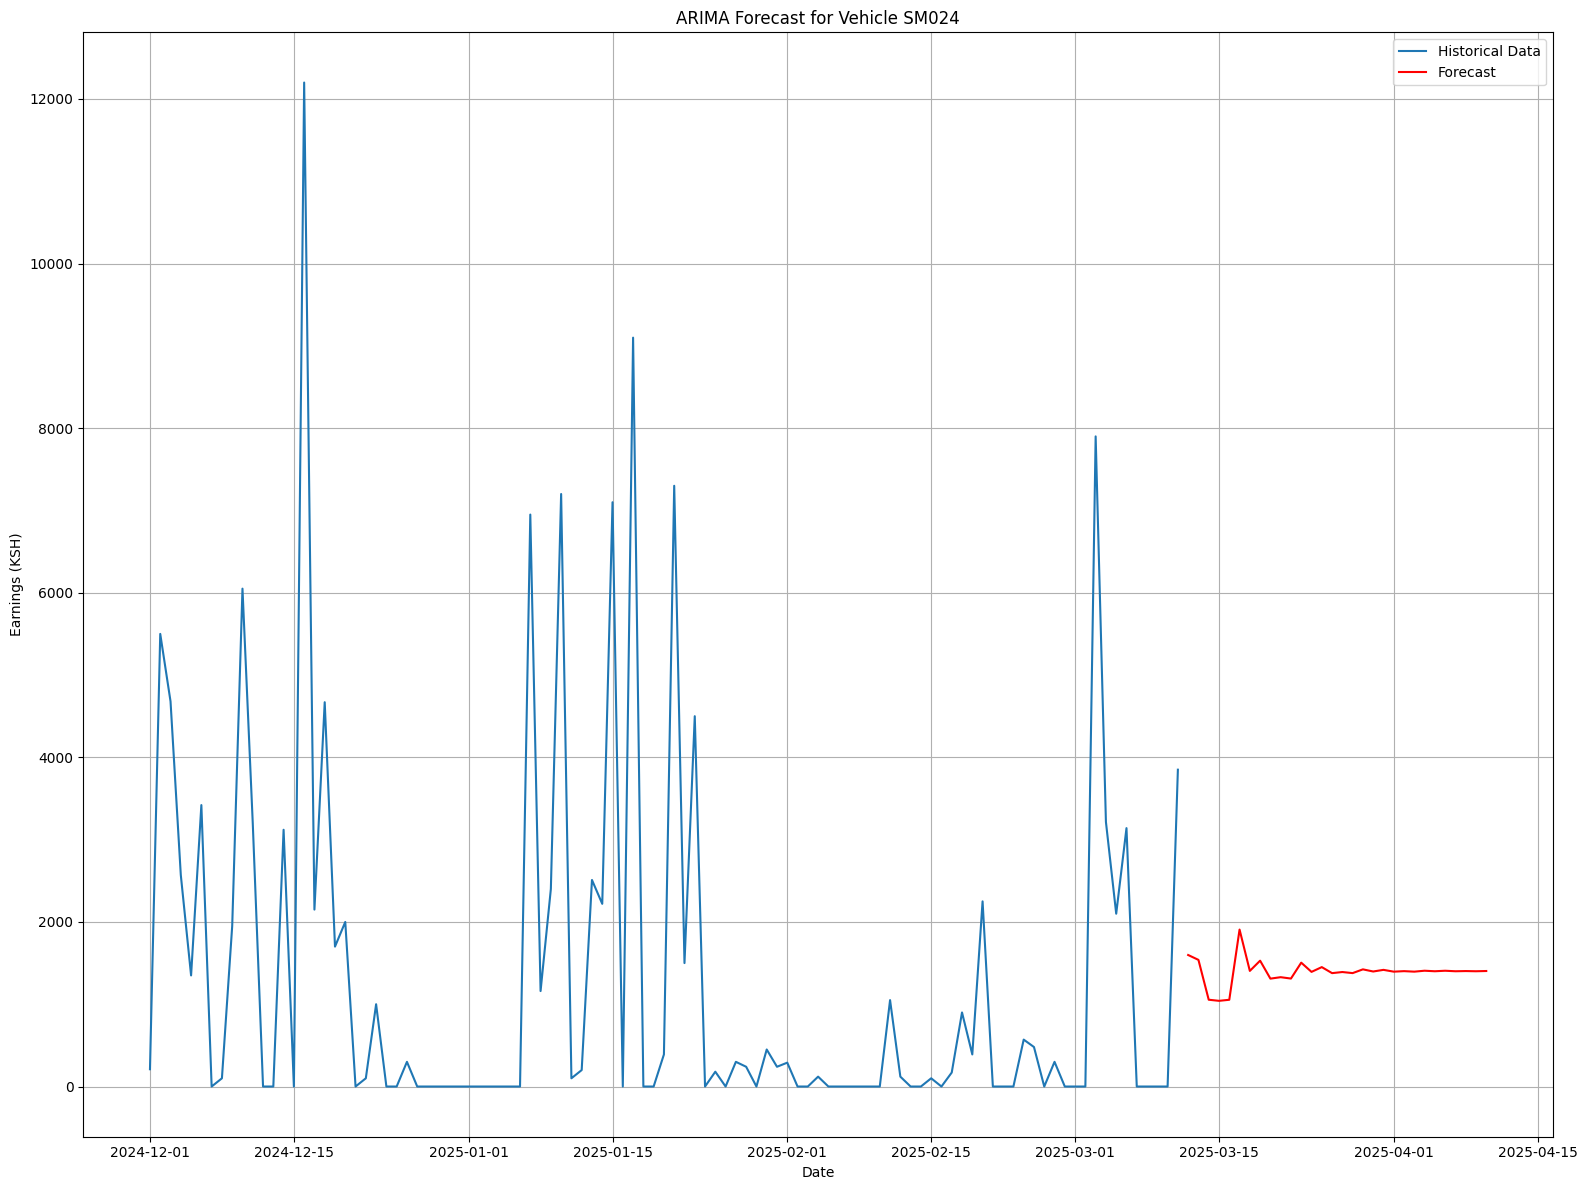

/home/tjselevani/Desktop/Apps/vscode/python/python analysis/venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


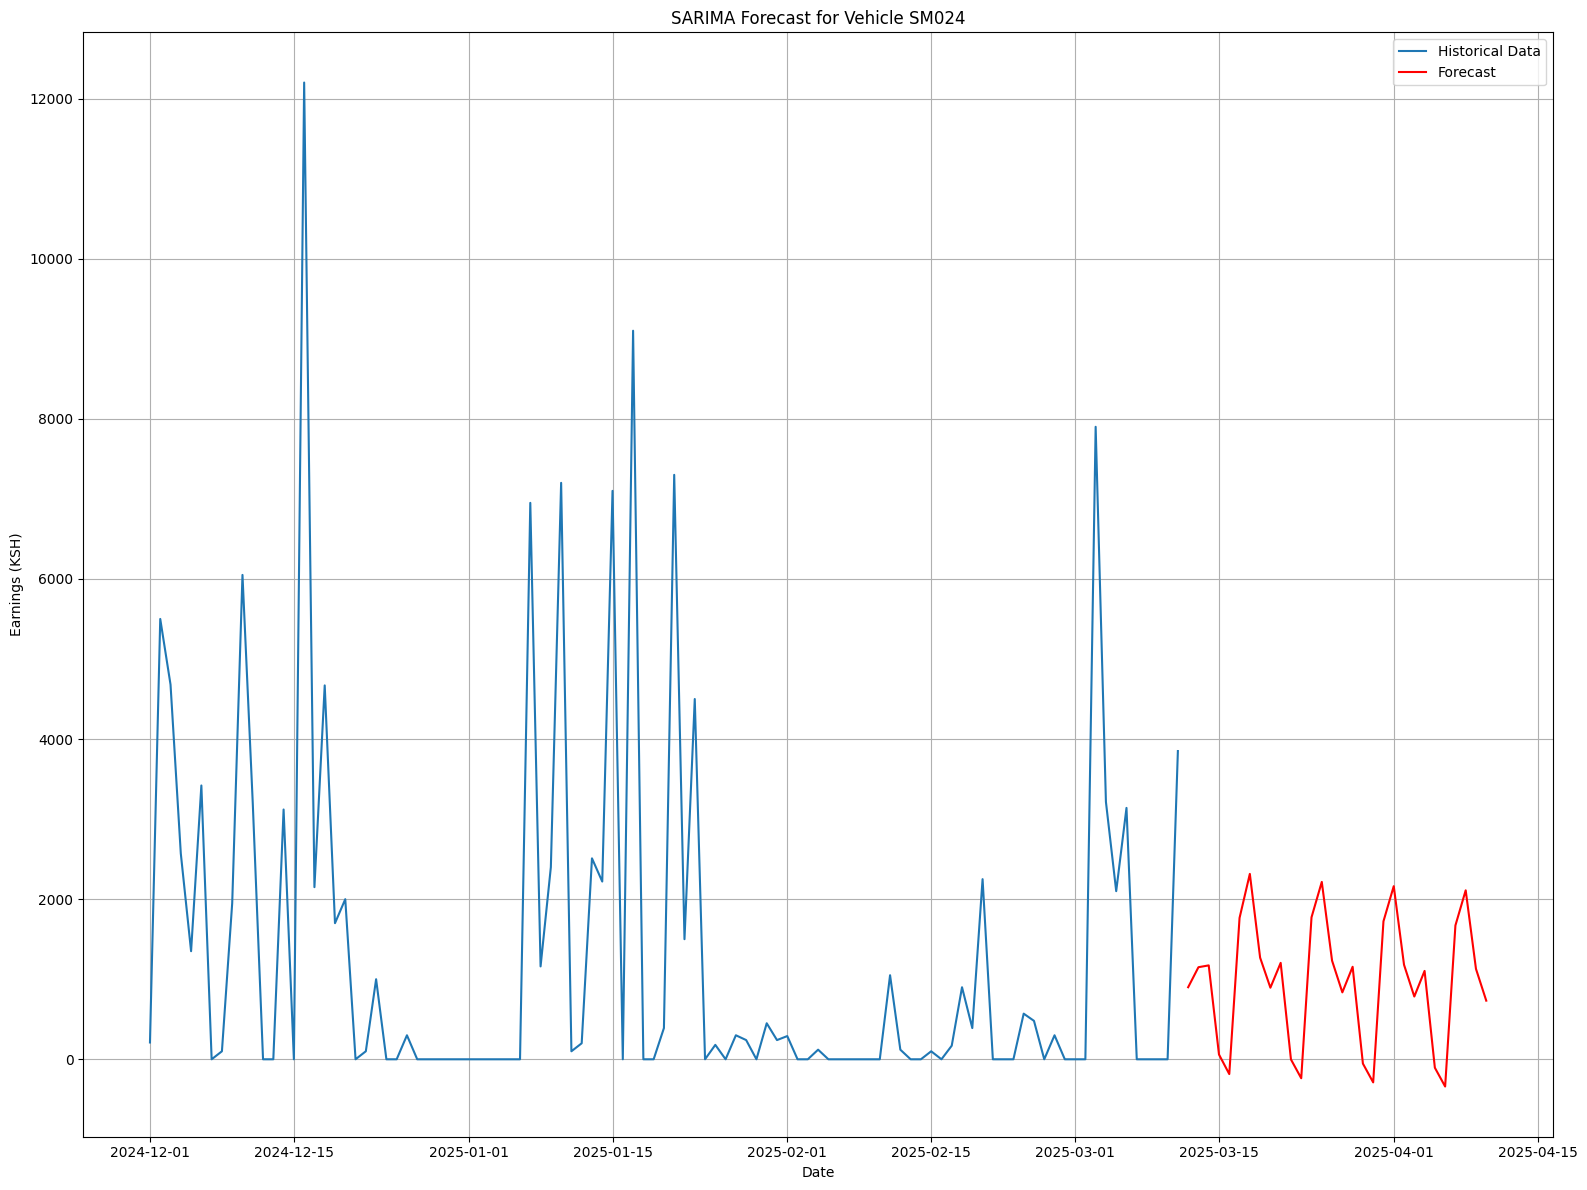

12:23:34 - cmdstanpy - INFO - Chain [1] start processing
12:23:34 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1600x1200 with 0 Axes>

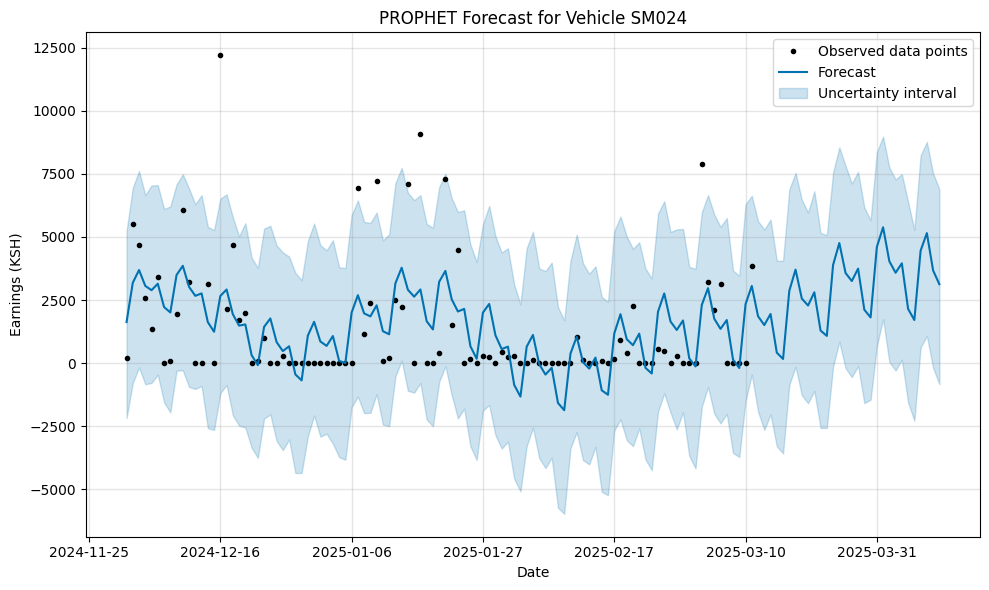

/home/tjselevani/Desktop/Apps/vscode/python/python analysis/utils/forecast/plot_forecast.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


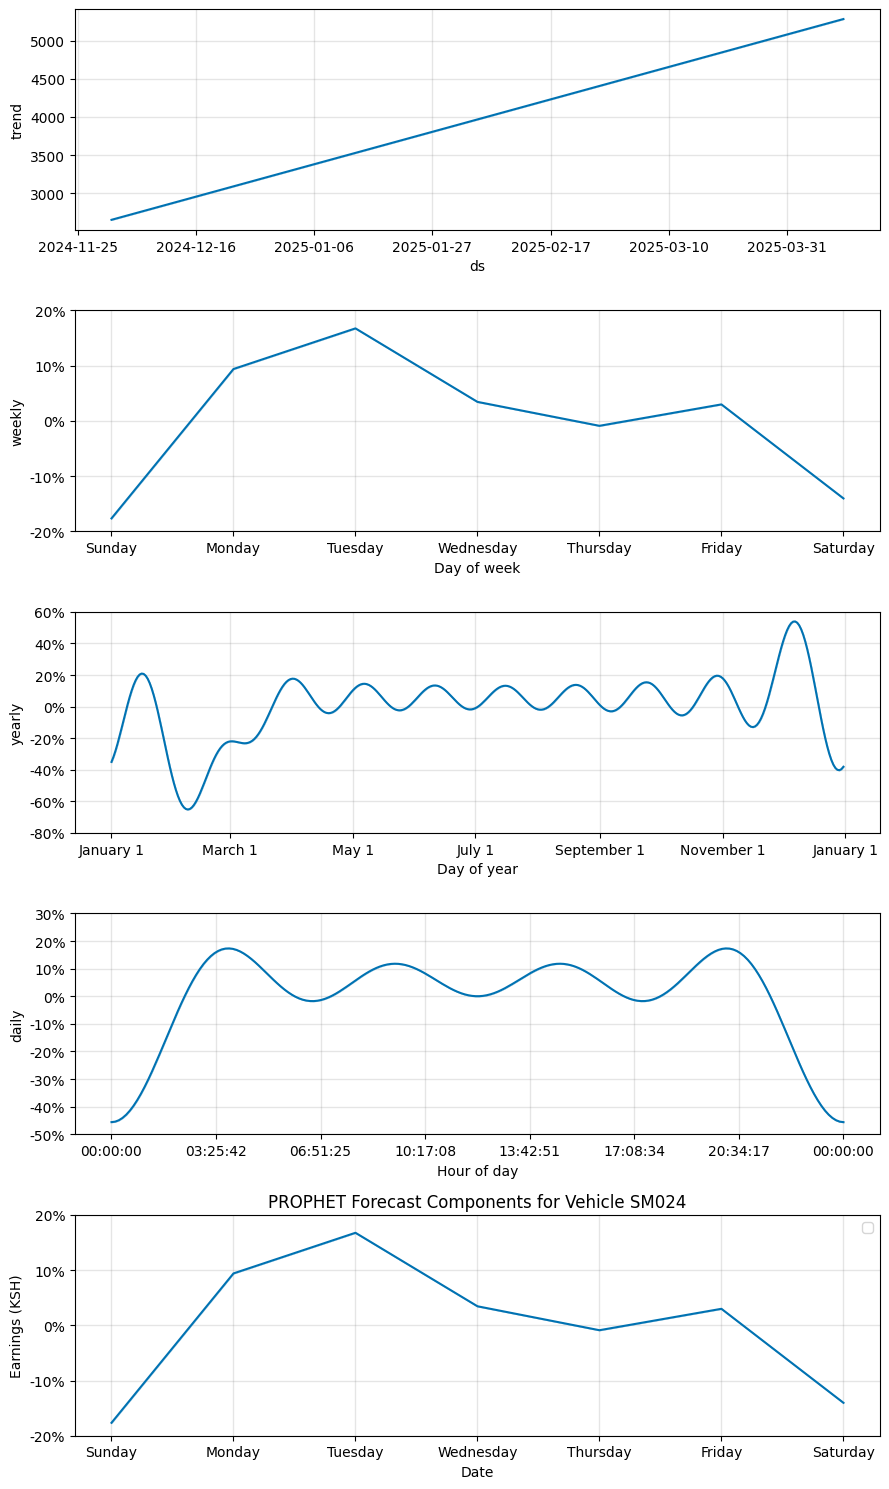

Forecast completed for vehicle SM024
Forecasted for 30 days into the future


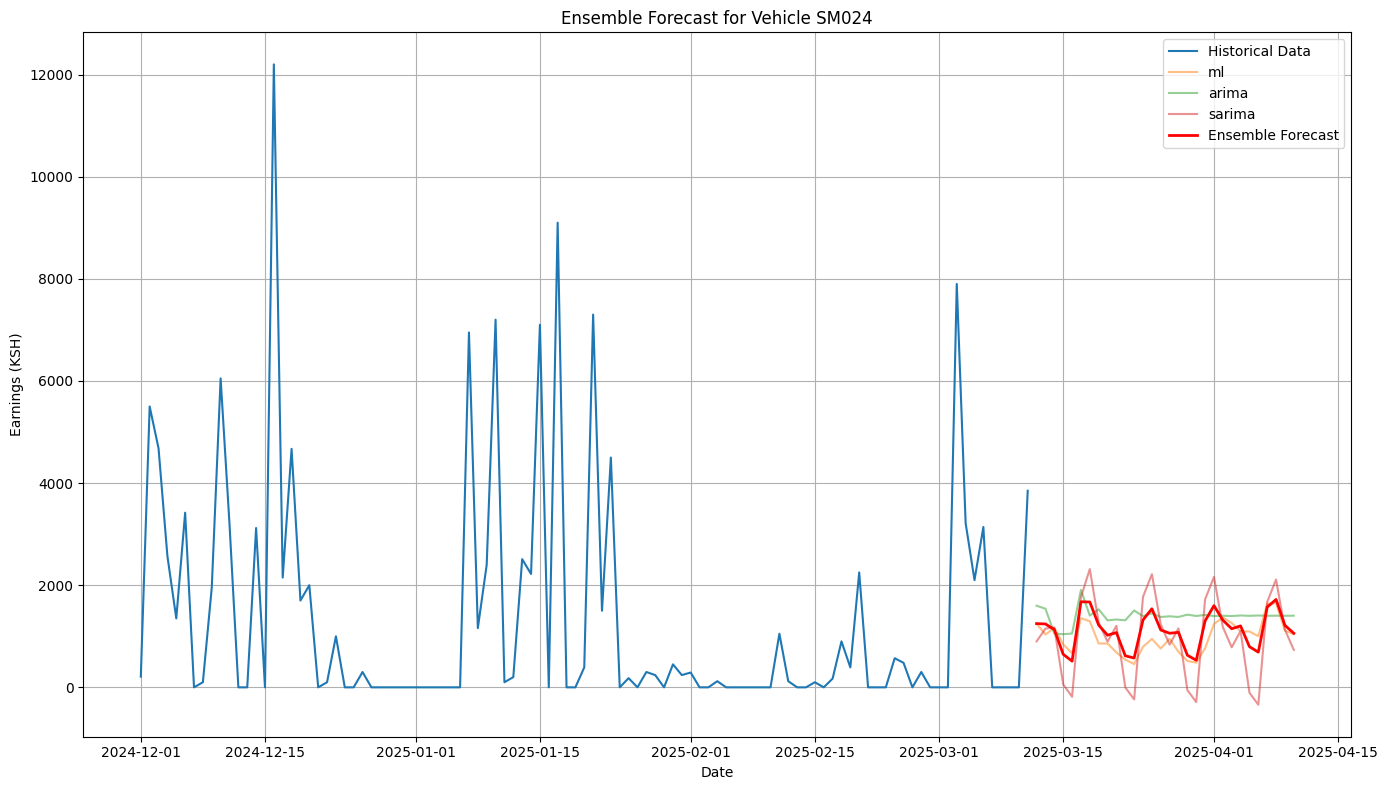

Ensemble Forecast for the next 7 days:
        date  ensemble_forecast
0 2025-03-12        1247.839478
1 2025-03-13        1240.999788
2 2025-03-14        1130.594520
3 2025-03-15         647.650637
4 2025-03-16         512.721141
5 2025-03-17        1675.803874
6 2025-03-18        1671.168670
Total predicted earnings for next 7 days: 8126.78 KSH
Average daily earnings: 1160.97 KSH


In [2]:
# Path to your data
data_path = DATA_CSV_FILE

# Vehicle to analyze
vehicle_id = "SM024"

# Run prediction for the vehicle
forecasts = run_prediction_for_vehicle(data_path, vehicle_id, forecast_days=30)

# Create ensemble forecast
ensemble_df = ensemble_forecast(forecasts)

# Plot ensemble forecast
ts_data = prepare_time_series_data(pd.read_csv(data_path), vehicle_id)
plot_ensemble_forecast(ts_data, ensemble_df, vehicle_id)

# Display the forecast for the next 7 days
print("Ensemble Forecast for the next 7 days:")
print(ensemble_df[["date", "ensemble_forecast"]].head(7))

# Calculate aggregate statistics
total_predicted = ensemble_df["ensemble_forecast"].head(7).sum()
average_daily = ensemble_df["ensemble_forecast"].head(7).mean()
print(f"Total predicted earnings for next 7 days: {total_predicted:.2f} KSH")
print(f"Average daily earnings: {average_daily:.2f} KSH")
